# Facial Expressions Recognition

# yüz ifadesi algılama

We are going to write a python script to train a custom supervised machine learning model using Tensorflow and Keras that will be able to recognize the emotions of a face.

data info:
* emotion -> type of picture like angry or sad etc..
* pixels -> resmin pixelleri
* usage -> ne için kullanacak, test yada trainig


epoch ->number of steps our program will nun in each proccess

ctr+m+l

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
#local olarak veriyi dahil ederken
#raw_data_csv_file_name = 'fer2013/fer2013.csv'

#google colab kullnırken
raw_data = pd.read_csv('/content/drive/My Drive/fer2013/fer2013.csv')

In [0]:
#raw_data = pd.read_csv(raw_data_csv_file_name)

In [0]:
raw_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
raw_data['emotion'].count()

35887

In [0]:
piksel_uzunlugu = len(raw_data['pixels'][0].split(' '))

In [0]:

print(piksel_uzunlugu)


2304


In [0]:
# training sütünü kaç tane eğitim için kaç tanesi ise test için kullanacak

raw_data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [6]:
cd /content/drive/My Drive/fer2013 

/content/drive/My Drive/fer2013


In [7]:
ls

Anger-708x492.jpg  haarcascade_frontalface_default.xml  process.png
fer2013.bib        happy.jpg                            README
fer2013.csv        model.h5                             toface.png


Nice, it looks like the data is already split for testing.
Let’s transform the input pixels to see how the first image looks.

yukarıda gördüğümüz gibi verilerimizi hem test hem de trainig olarak bölündü
bundan ilk pixselin nasıl bir resim olduğunu bakalım

In [0]:
# ilk resmin pikseli
#raw_data['pixels'][1]

In [0]:
img = raw_data['pixels'][11]
val_sep = img.split(' ')
x_pixels = np.array(val_sep, 'float32')

In [0]:
# bir resim 0-255 arasında olduğu için her değerimizi 255 bölüp 
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)

http://csfieldguide.org.nz/en/interactives/pixel-viewer/index.html

In [0]:
# Önemli olan kütüphanleri import edelim

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

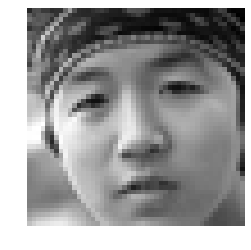

In [0]:
plt.imshow(x_reshaped,cmap='gray',interpolation='nearest')
plt.axis("off")
plt.show()

In [0]:
![image](toface.png)

/bin/bash: -c: line 0: syntax error near unexpected token `toface.png'
/bin/bash: -c: line 0: `[image](toface.png)'


In [0]:
from IPython.display import Image

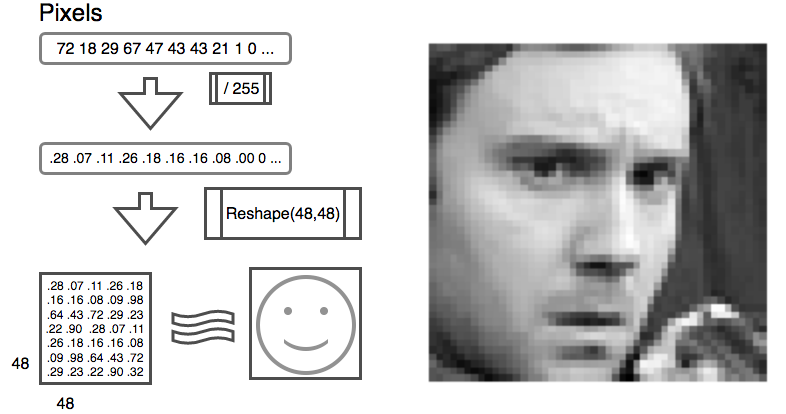

In [0]:
Image(filename='toface.png',width=500,height=300)

#  training and testing the model

In [0]:
import tensorflow as tf

In [9]:
import keras

from keras.models import Sequential # use when initiliazing NN 
from keras.layers import Convolution2D # first step of CNN and we add convolutionals and videos 2D but videos are 3D
from keras.layers import  MaxPooling2D # mekansal değişmezlik ortadan kaldırmak içinMaxPooling2D
from keras.layers import  AveragePooling2D
from keras.layers import Flatten # converting pooled features into vector to input full-connected(NN)
from keras.layers import Dense # used to fully-connected
from keras.layers import Activation 
from keras.layers import Dropout 

Using TensorFlow backend.


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [0]:
raw_data.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [0]:
#bizim model boyunca kullanacağımız değişkenleri tanımlayalım
#çıktığımız(output) yedi tane sınıftan oluşacağından 

num_class = 7

# her resim 0-255 arasında oluştuğundan piksellerimizi sonradan bölüceğımız sayı
batch_size = 256

#modelin eğitirken epoch sayısı (kaç adımla programımız çalışacak)

epochs = 25

In [0]:
#initialize trainset and test set
X_train, y_train, X_test, y_test = [], [], [], []

In [15]:
X_train

[]

In [0]:
# kullanacağımız veriyi training ve test olarak ayırmanın 2. adım

satun = raw_data['emotion'].count()
for i in range(1,satun):
    try:
#       print(i)
        #burada image(pixels) sayi olarak(bites) olarak verildi
  
      img = raw_data['pixels'][i]
      val_sep = img.split(' ')
      x_pixels = np.array(val_sep, 'float32')
      emotion = keras.utils.to_categorical(raw_data['emotion'][i], num_class)
      emo = keras.utils.np_utils.to_categorical(raw_data['emotion'][i], num_class)
      #print(emotion)
      
#       category = raw_data['Usage'][i]
#       print(catX-egory)
    
      if raw_data['Usage'][i]=='Training':
        y_train.append(emotion)
        X_train.append(x_pixels)
          
      elif raw_data['Usage'][i]=='PublicTest':
        y_test.append(emotion)
        X_test.append(x_pixels)
      else:
        pass
    except:
      print("", end="")

In [17]:
X_train[2]

array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32)

In [18]:
X_test[2]

array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32)

In [19]:
#data transformation for train and test sets

# verileri sadece değer olarak test ve train değişkenlerde tutalım
# bu değişkenler aynı zamanda bir numpy array olduğunu belirtelim ki sonra sayı olarak kullanmak istediğimizi hat vermesin

X_train = np.array(X_train,'float32')
X_test = np.array(X_test,'float32')
y_train = np.array(y_train,'float32')
y_test = np.array(y_test,'float32')

#veriyi normalızasyon haline dönüştürelim çünkü bir resim 0-255 arasında bi değer sahip ve sayıyı(256) bölelim ki [0, 1] arasında bir değer bulalım
X_train /= 255 
X_test /= 255

# şimdiki verimiz bir satir şeklindedir ama bunun yerine matris olarak dönütürelim

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape, ' train verinin örneği')
print(X_test.shape, ' test verinin örneği')


(28708, 48, 48, 1)  train verinin örneği
(3589, 48, 48, 1)  test verinin örneği


In [20]:
X_train.view()[2]

array([[[0.09411765],
        [0.1254902 ],
        [0.14117648],
        ...,
        [0.6784314 ],
        [0.6745098 ],
        [0.6784314 ]],

       [[0.09803922],
        [0.13333334],
        [0.11372549],
        ...,
        [0.6784314 ],
        [0.6745098 ],
        [0.6784314 ]],

       [[0.10196079],
        [0.11372549],
        [0.09803922],
        ...,
        [0.6745098 ],
        [0.6745098 ],
        [0.68235296]],

       ...,

       [[0.62352943],
        [0.7254902 ],
        [0.6156863 ],
        ...,
        [0.6156863 ],
        [0.6117647 ],
        [0.6       ]],

       [[0.53333336],
        [0.6156863 ],
        [0.73333335],
        ...,
        [0.59607846],
        [0.59607846],
        [0.5882353 ]],

       [[0.5686275 ],
        [0.50980395],
        [0.6313726 ],
        ...,
        [0.5568628 ],
        [0.56078434],
        [0.5568628 ]]], dtype=float32)

In [0]:
# artik verimiz hazır olduktan modelimizi training edebiliriz

#let's initiliaze the model
model = Sequential()

# ilk Layerimizi (1. convolutional Layer) oluşturalım
model.add(Convolution2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))


#mekansal değişmezlik olan max pooling cağralım
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

          
# 2. Layerimizi (2. convolutional Layer) oluşturalım
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
    
#3rd convolution layer
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_class, activation='softmax'))
     
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, y_train, batch_size=batch_size)


#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy'])

fit = False

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
  
else:
	model.load_weights('model.h5') #load weights
#function for drawing bar chart for emotion preditions
# bizim sonuçumuz hangi output'a ait olduğunu gösteren grafik

def emotion_analysis(emotions):
    objects = ('Öfke', 'Iğrenme', 'Korku', 'Mutluluk', 'Üzüntü', 'Şaşırma', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [0]:
# eğitimiz modeli kaydedelim

model.save('model.h5')

In [2]:
pwd


'/content'

In [23]:
# Training ettiğimiz modelimizi test edelim

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])


Train loss: 0.10240204738481838
Train accuracy: 97.19938693047234
Test loss: 2.532611234435865
Test accuracy: 56.11590972457233


Yukarıdaki test doğruluğunda %56 ile öğremiş oldu.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

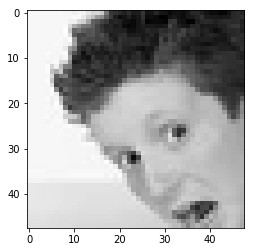

[3.2111080e-10 2.2731601e-24 2.3031951e-07 9.4350704e-05 9.9990547e-01
 2.0082236e-09 2.1364727e-15]


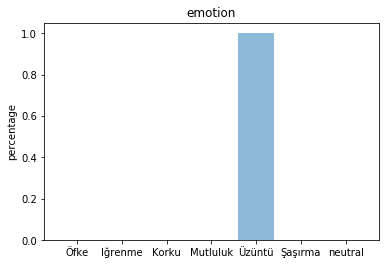

----------------------------------------------


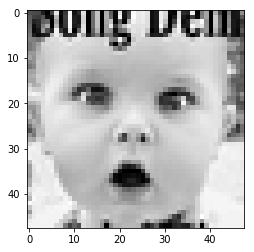

[3.2570742e-09 9.1018891e-28 1.1456134e-12 2.1638914e-22 8.2983520e-18
 1.0000000e+00 1.4368561e-11]


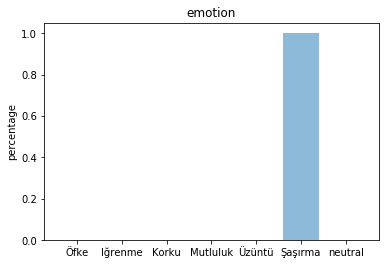

----------------------------------------------


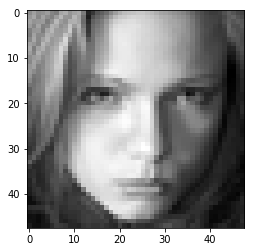

[1.7239104e-01 6.0875671e-08 1.1753420e-01 5.5960026e-03 2.8359303e-01
 9.2683325e-04 4.1995889e-01]


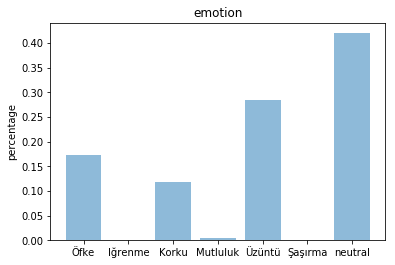

----------------------------------------------


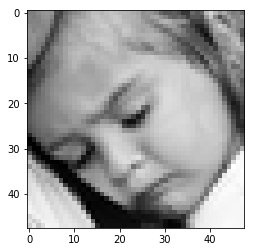

[4.3035277e-05 1.7026023e-14 2.6771286e-01 2.3025843e-06 7.2836816e-01
 5.8884663e-05 3.8148006e-03]


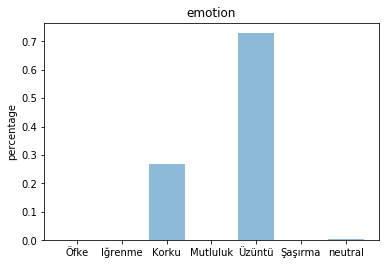

----------------------------------------------


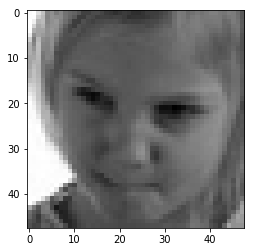

[9.9965334e-01 1.4080573e-08 1.3039329e-06 5.3565191e-08 3.4538380e-04
 6.5758413e-11 6.8305779e-09]


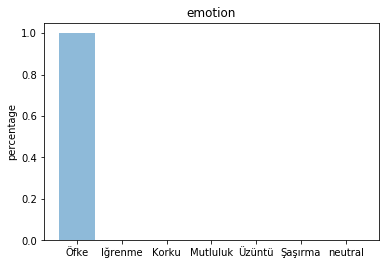

----------------------------------------------


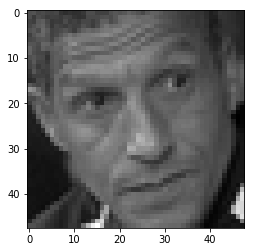

[0.11294738 0.02738793 0.6410032  0.01272016 0.12663324 0.00720919
 0.07209902]


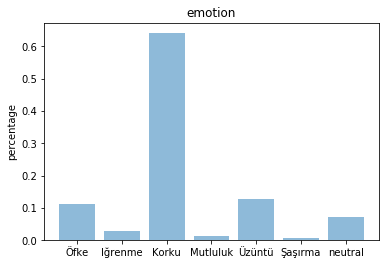

----------------------------------------------


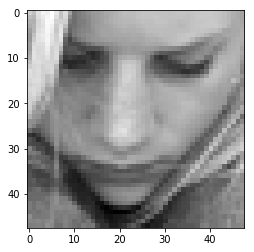

[6.6986526e-05 1.7175347e-13 2.0352729e-02 9.0451848e-13 9.7941244e-01
 3.7582926e-14 1.6782661e-04]


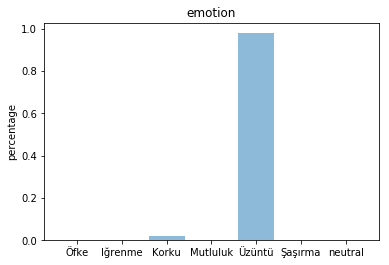

----------------------------------------------


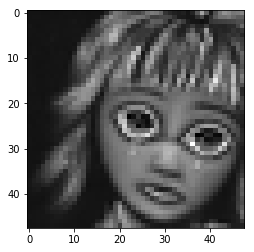

[7.4422903e-02 4.5515144e-10 5.3062832e-01 2.0638062e-01 1.1857919e-02
 1.4908469e-01 2.7625566e-02]


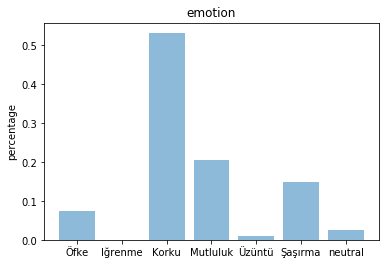

----------------------------------------------


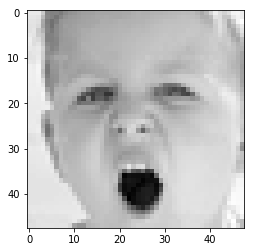

[9.9911851e-01 2.8068975e-10 4.3682044e-04 2.2675369e-08 1.1335193e-04
 3.3074728e-04 4.8481985e-07]


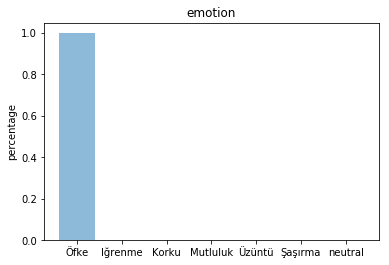

----------------------------------------------


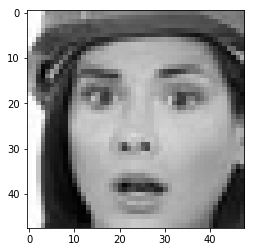

[1.2917146e-09 1.3471316e-21 3.2418832e-02 4.3484935e-10 7.5956107e-14
 9.6758121e-01 2.3643520e-14]


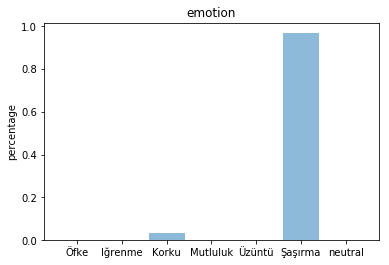

----------------------------------------------


In [25]:
# Modelimizi test edelim

monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(X_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(X_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [26]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []
actual_list = []
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
  
  
for i in y_test:
  actual_list.append(np.argmax(i))
  
  
conf =confusion_matrix(actual_list, pred_list)

ort = pd.DataFrame(conf,columns=['Öfke', 'Iğrenme', 'Korku', 'Mutluluk', 'Üzüntü', 'Şaşırma', 'neutral'])
print(ort)


   Öfke  Iğrenme  Korku  Mutluluk  Üzüntü  Şaşırma  neutral
0   221        8     49        54      59       12       64
1    14       30      3         4       2        1        2
2    59        2    175        43      93       41       83
3    32        2     24       712      33       21       71
4    97        3     72        80     255       15      131
5    11        0     31        26      11      317       19
6    62        2     43        90      92       14      304


**Cupturing Faces**

teste kullanacak resmileri renkleri ve arka tarafta farklı nesneler olacağından biz sadece yüze odaklanmasını istedğimiz için, yüzleri alalım

In [27]:
import cv2
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('1.jpg')


'NoneType' object has no attribute 'shape'


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


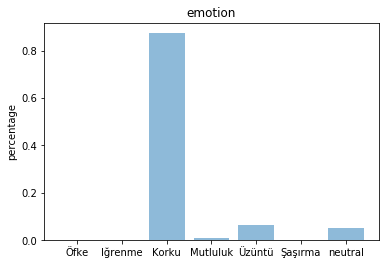

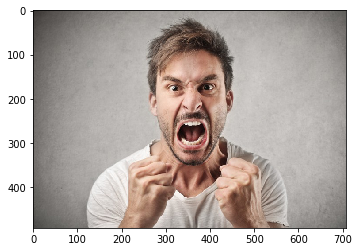

In [28]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'Anger-708x492.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()